In [1]:
from __future__ import print_function

In [2]:
import numpy as np

In [17]:
from keras.models import Model
from keras.layers import Input,Dense,BatchNormalization,Reshape, Convolution2D, Activation, Flatten, UpSampling2D,Dropout, Conv2D, concatenate
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
gen_input_dim = 128
batch_size=100
drop_rate = 0.2
img_shape = [28,28,1]

In [5]:
def switch_training(model, is_trainable):
    model.trainable = is_trainable
    for layer in model.layers:
        layer.trainable = is_trainable

In [46]:
num_channel = 100
input_data = Input(shape=[gen_input_dim])
X = Dense(num_channel*14*14, activation='relu')(input_data)
X = Reshape([14,14, num_channel])(X)
X = UpSampling2D(size=(2,2))(X)
X = Conv2D(int(num_channel/2), (3, 3), padding='same')(X)
X = BatchNormalization()(X)
X = Conv2D(int(num_channel/4), (3, 3), padding='same')(X)
X = BatchNormalization()(X)
X = Conv2D(1, (1, 1), padding='same')(X)
Y = Activation('sigmoid')(X)

generator = Model(inputs=[input_data], outputs=Y )
generator.compile(optimizer="adam", loss="binary_crossentropy")
    

In [13]:

input_data = Input(shape=img_shape)
X = Conv2D(256, (5, 5), strides=(2, 2), padding='same', activation='relu')(input_data)
X = Dropout(drop_rate)(X)
X = Conv2D(512, (5, 5), strides=(2, 2), padding='same', activation='relu')(X)
X = Dropout(drop_rate)(X)
X = Flatten()(X)
X = Dense(256, activation='relu')(X)
X = Dropout(drop_rate)(X)
Y = Dense(2,activation='softmax')(X)

discriminator = Model(inputs=[input_data], outputs=Y)
discriminator.compile(loss='categorical_crossentropy', optimizer="adam")


    


In [48]:

switch_training(discriminator, False)

input_data = Input(shape=[gen_input_dim])
X = generator(input_data)
Y = discriminator(X)
GAN = Model(inputs=input_data, outputs=Y)
GAN.compile(loss='categorical_crossentropy', optimizer="adam")


In [16]:
data = input_data.read_data_sets("../data_mnist/", one_hot=True)

Extracting ../data_mnist/train-images-idx3-ubyte.gz
Extracting ../data_mnist/train-labels-idx1-ubyte.gz
Extracting ../data_mnist/t10k-images-idx3-ubyte.gz
Extracting ../data_mnist/t10k-labels-idx1-ubyte.gz


In [69]:
switch_training(discriminator, True)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 256)       6656      
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 512)         3277312   
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               6422784   
__________

In [71]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 19600)             2528400   
_________________________________________________________________
reshape_12 (Reshape)         (None, 14, 14, 100)       0         
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 28, 28, 100)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 50)        45050     
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 50)        200       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 25)        11275     
__________

In [70]:
GAN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 128)               0         
_________________________________________________________________
model_10 (Model)             (None, 28, 28, 1)         2585051   
_________________________________________________________________
model_7 (Model)              (None, 2)                 9707266   
Total params: 12,292,317.0
Trainable params: 12,292,167.0
Non-trainable params: 150.0
_________________________________________________________________


In [75]:
switch_training(discriminator, False)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 256)       6656      
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 512)         3277312   
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               6422784   
__________

In [76]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 19600)             2528400   
_________________________________________________________________
reshape_12 (Reshape)         (None, 14, 14, 100)       0         
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 28, 28, 100)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 50)        45050     
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 50)        200       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 25)        11275     
__________

In [77]:
GAN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 128)               0         
_________________________________________________________________
model_10 (Model)             (None, 28, 28, 1)         2585051   
_________________________________________________________________
model_7 (Model)              (None, 2)                 9707266   
Total params: 12,292,317.0
Trainable params: 2,584,901.0
Non-trainable params: 9,707,416.0
_________________________________________________________________


In [83]:
for ep in range(10):
    for i in range(100):
        batch_xs, batch_ys = data.train.next_batch(batch_size)
        
        noisy_img = np.random.uniform(0,1,size=[batch_size, gen_input_dim])
        gen_imgs = generator.predict(noisy_img)
        
        batch_xs = batch_xs.reshape((batch_size, 28, 28, 1))
       
        p = np.random.permutation(2*batch_size)
        X=  np.concatenate([batch_xs, gen_imgs])
        
        y = np.zeros([2*batch_size,2])
        y[:batch_size,1] = 1
        y[batch_size:,0] = 1
            
        
        switch_training(discriminator,True)
        d_loss  = discriminator.train_on_batch(X[p],y[p])
    
        noise_input = np.random.uniform(0,1,size=[batch_size,gen_input_dim])
        y = np.zeros([batch_size,2])
        y[:,1] = 1
        
        
        switch_training(discriminator,False)
        g_loss = GAN.train_on_batch(noise_input, y )

        if i % (batch_size*10) == 0:
            print('Epoch:%d, Steps Completed: %6d' % (ep,i))

            print('Discriminator loss: ', d_loss, ' Generator loss: ', g_loss)

Epoch:0, Steps Completed:      0
Discriminator loss:  2.30873e-05  Generator loss:  0.0751128
Epoch:1, Steps Completed:      0
Discriminator loss:  3.01213e-05  Generator loss:  0.229592
Epoch:2, Steps Completed:      0
Discriminator loss:  0.000131809  Generator loss:  11.9219
Epoch:3, Steps Completed:      0
Discriminator loss:  5.20053e-05  Generator loss:  1.61188
Epoch:4, Steps Completed:      0
Discriminator loss:  1.87126e-05  Generator loss:  0.00561022
Epoch:5, Steps Completed:      0
Discriminator loss:  6.84664e-05  Generator loss:  11.9486
Epoch:6, Steps Completed:      0
Discriminator loss:  0.00270478  Generator loss:  0.049847
Epoch:7, Steps Completed:      0
Discriminator loss:  0.0711449  Generator loss:  0.361662
Epoch:8, Steps Completed:      0
Discriminator loss:  1.2219e-07  Generator loss:  15.9146
Epoch:9, Steps Completed:      0
Discriminator loss:  0.00053902  Generator loss:  0.0308287


In [89]:
noise_input = np.random.uniform(0,1,size=[batch_size,gen_input_dim])
output = generator.predict(noise_input)

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

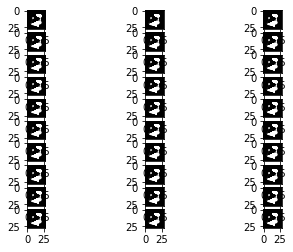

In [92]:
plt.figure(figsize=(8, 12))
for i in range(10):
    plt.subplot(10, 3, 3*i+1)
    plt.imshow(output[3*i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    
    plt.subplot(10, 3, 3*i+2)
    plt.imshow(output[3*i+1].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    
    plt.subplot(10, 3, 3*i+3)
    plt.imshow(output[3*i+2].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    
    